In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder

sns.set(style="whitegrid")


**Load Data**

In [3]:
df = pd.read_excel(r'C:\data\online_course dataset.xlsx')

In [4]:
df.head()

,Title,Category,Instructor,Price,Reviews,Rating,Duration,Lecture Numbers,Difficulty
0,[AI] Create a Object Recognition Web App with ...,Artificial Intelligence,Alex Bakker,2009,37,4.3,3.0,42,All Levels
1,"[NEW] Learn AI, ML, DL, Gen AI Basics: A Quick...",Artificial Intelligence,Ramesh Fadatare (Java Guides),799,1,5.0,2.5,37,All Levels
2,10 Days of No Code Artificial Intelligence Boo...,Artificial Intelligence,"Prof. Ryan Ahmed, Ph.D., MBA | Best-Selling In...",4379,2140,4.4,12.5,114,All Levels
3,AI & Cognitive Science: Bridging Minds and Mac...,Artificial Intelligence,YouAccel Training,2989,101,4.0,21.5,181,All Levels
4,AI and Machine Learning Foundations for Busine...,Artificial Intelligence,"Irlon Terblanche, Peter Alkema",799,34,4.6,3.5,33,All Levels


**Data Overview**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8249 entries, 0 to 8248
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            8249 non-null   object 
 1   Category         8249 non-null   object 
 2   Instructor       8248 non-null   object 
 3   Price            8249 non-null   int64  
 4   Reviews          8249 non-null   int64  
 5   Rating           8249 non-null   float64
 6   Duration         8249 non-null   float64
 7   Lecture Numbers  8249 non-null   int64  
 8   Difficulty       8201 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 580.1+ KB


In [6]:
df.shape

(8249, 9)

In [7]:
df.columns

Index(['Title', 'Category', 'Instructor', 'Price', 'Reviews', 'Rating',
       'Duration', 'Lecture Numbers', 'Difficulty'],
      dtype='object')

**Missing and Unique Values**

In [8]:
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing)

Missing values:
 Difficulty         48
Instructor          1
Title               0
Category            0
Price               0
Reviews             0
Rating              0
Duration            0
Lecture Numbers     0
dtype: int64


**Basic cleaning & missing value handling**

Clean column names

In [9]:
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(" ", "_"))


**Unique values**

In [10]:
print("\nNumber of unique values per column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

cat_cols_basic = ["category", "difficulty"]
for col in cat_cols_basic:
    print(f"\nUnique values in {col} ({df[col].nunique()}):")
    print(df[col].unique())



Number of unique values per column:

title: 8159
category: 12
instructor: 4118
price: 376
reviews: 2008
rating: 30
duration: 172
lecture_numbers: 415
difficulty: 4

Unique values in category (12):
['Artificial Intelligence' 'Business' 'Data Science' 'Data Visualization'
 'Design' 'Excel' 'Finance and Accounting' 'Machine Learning'
 'Photography and Videography' 'Project Management' 'Python' 'Statistics']

Unique values in difficulty (4):
['All Levels' 'Beginner' 'Expert' 'Intermediate' nan]


Convert numeric columns

In [11]:
num_cols_raw = ["price", "reviews", "rating", "duration", "lecture_numbers"]
for col in num_cols_raw:
    df[col] = pd.to_numeric(df[col], errors="coerce")

Clean and Handle missing values for instructor and difficulty

In [12]:
df["difficulty"] = df["difficulty"].astype(str).str.strip()
df["difficulty"] = df["difficulty"].fillna("Unknown")


In [13]:
df["instructor"] = df["instructor"].astype(str).str.strip()
df["instructor"] = df["instructor"].fillna("Unknown Instructor")


In [14]:
print("\nMissing values after handling difficulty & instructor:")
print(df.isna().sum())



Missing values after handling difficulty & instructor:
title              0
category           0
instructor         0
price              0
reviews            0
rating             0
duration           0
lecture_numbers    0
difficulty         0
dtype: int64


**Instructor popularity proxy**

In [15]:
instructor_stats = (
    df.groupby("instructor")
      .agg(
          instr_total_reviews=("reviews", "sum"),
          instr_mean_rating=("rating", "mean"),
          instr_course_count=("title", "count")
      )
      .reset_index()
)

print("\nInstructor-level stats (sample):")
print(instructor_stats.head())

# Merge back to course level
df = df.merge(instructor_stats, on="instructor", how="left")

# Log-transform total reviews as popularity proxy
df["instr_log_total_reviews"] = np.log1p(df["instr_total_reviews"])



Instructor-level stats (sample):
                    instructor  instr_total_reviews  instr_mean_rating  \
0  1MinAI.COM By IWD Creations                    9           4.900000   
1                 247 Learning                   72           4.233333   
2            29 Indigo Academy                 1401           4.500000   
3     2D Animation 101 Courses                   62           4.500000   
4                  365 Academy                  190           4.866667   

   instr_course_count  
0                   1  
1                   3  
2                   1  
3                   1  
4                   3  


Numeric summary (before outlier handling):
             price        reviews       rating     duration  lecture_numbers  \
count  8249.000000    8249.000000  8249.000000  8249.000000      8249.000000   
mean   1856.933083    1489.115287     4.371015     7.670445        63.795854   
std    1038.388072   12346.976481     0.325195    12.470131        83.128183   
min     799.000000       1.000000     0.000000     0.500000         4.000000   
25%     799.000000      37.000000     4.200000     2.000000        21.000000   
50%    1789.000000     118.000000     4.400000     4.000000        37.000000   
75%    2619.000000     448.000000     4.600000     8.500000        72.000000   
max    7899.000000  553884.000000     5.000000   245.000000       800.000000   

       instr_total_reviews  instr_log_total_reviews  instr_mean_rating  \
count          8249.000000              8249.000000        8249.000000   
mean          15717.919020                 6.614531           4.371015   
std           

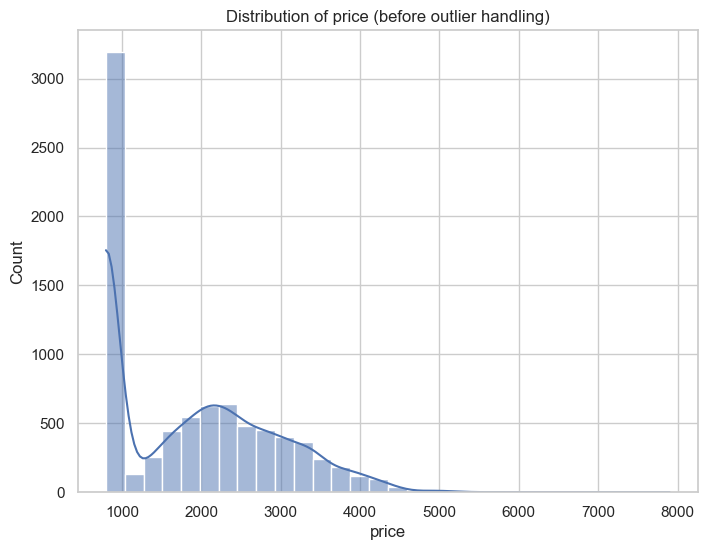

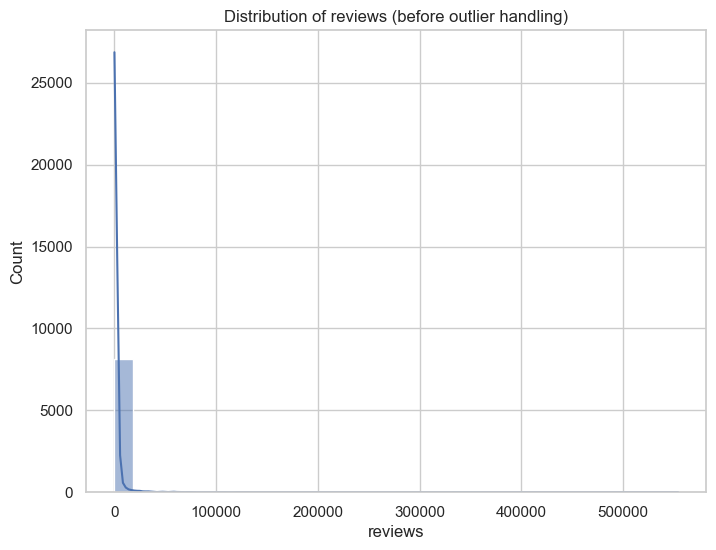

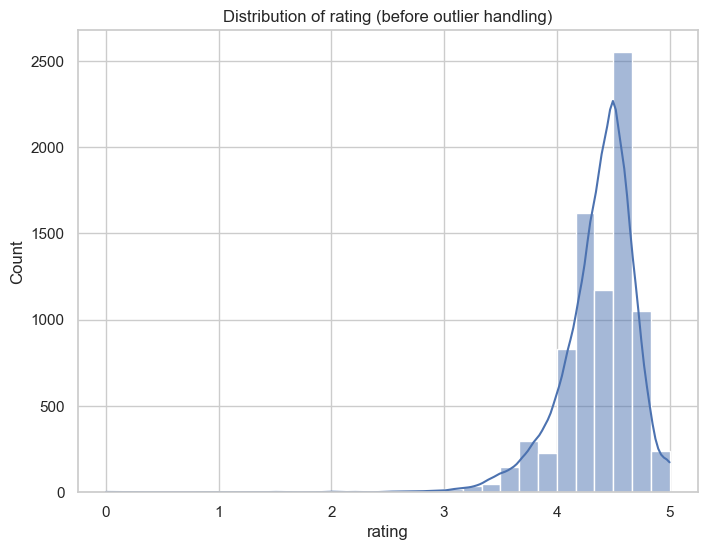

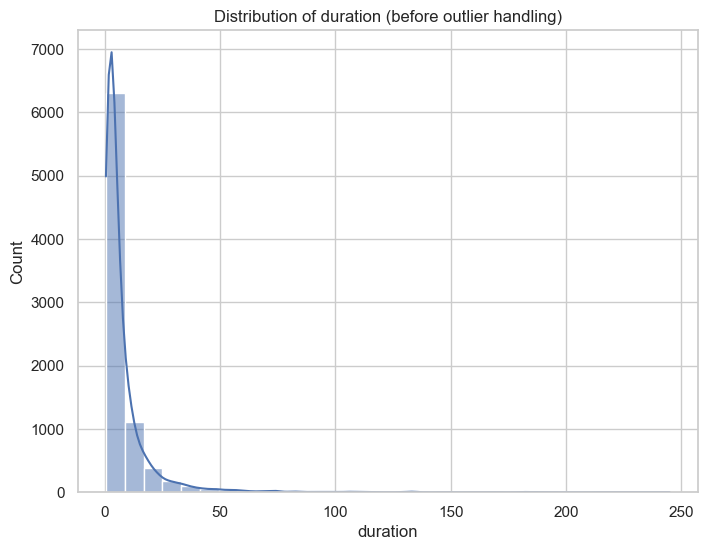

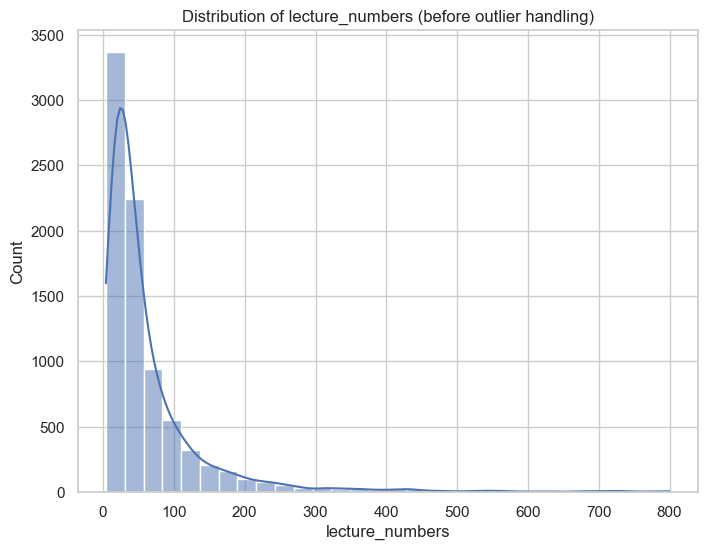

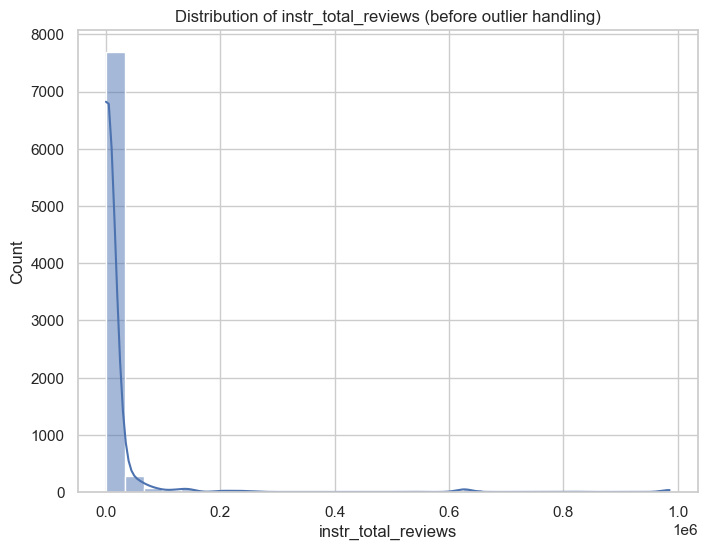

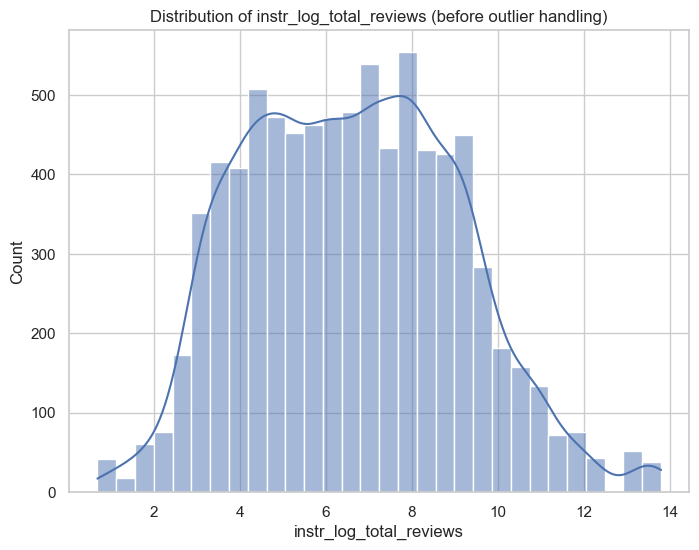

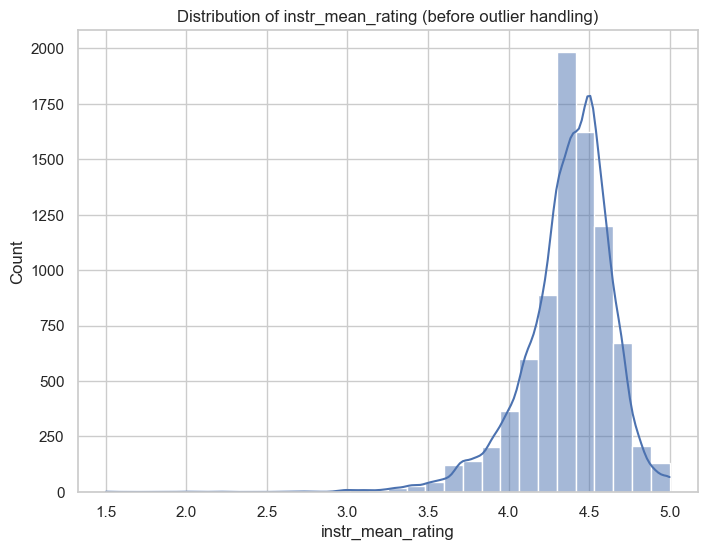

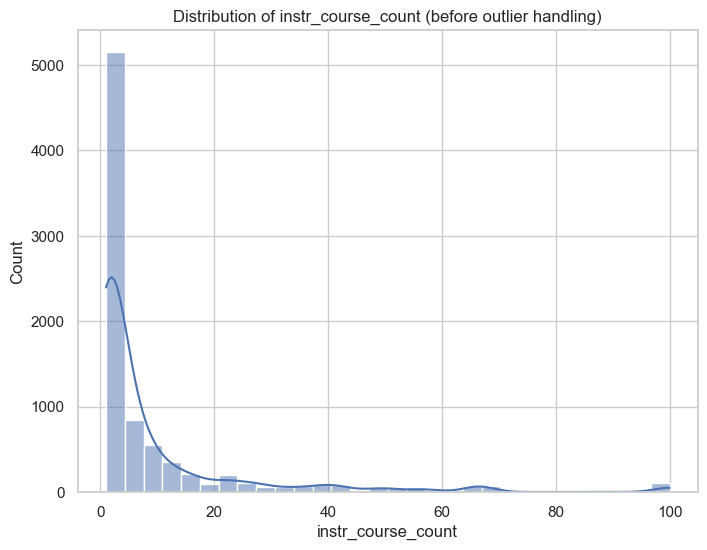


Value counts for category :
category
Finance and Accounting         2256
Data Science                   1696
Business                       1602
Photography and Videography    1352
Python                          439
Design                          300
Excel                           114
Artificial Intelligence         112
Data Visualization              105
Project Management               98
Statistics                       95
Machine Learning                 80
Name: count, dtype: int64


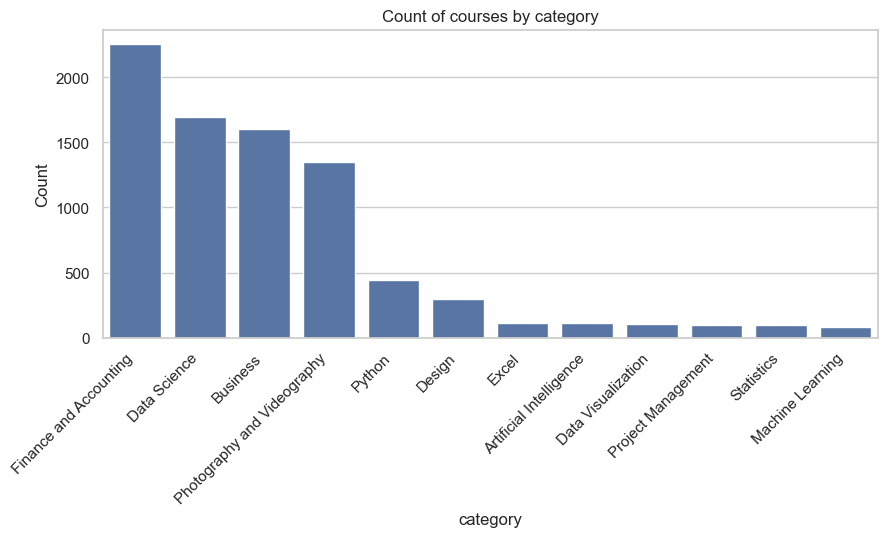


Value counts for difficulty :
difficulty
All Levels      4878
Beginner        2477
Intermediate     750
Expert            96
nan               48
Name: count, dtype: int64


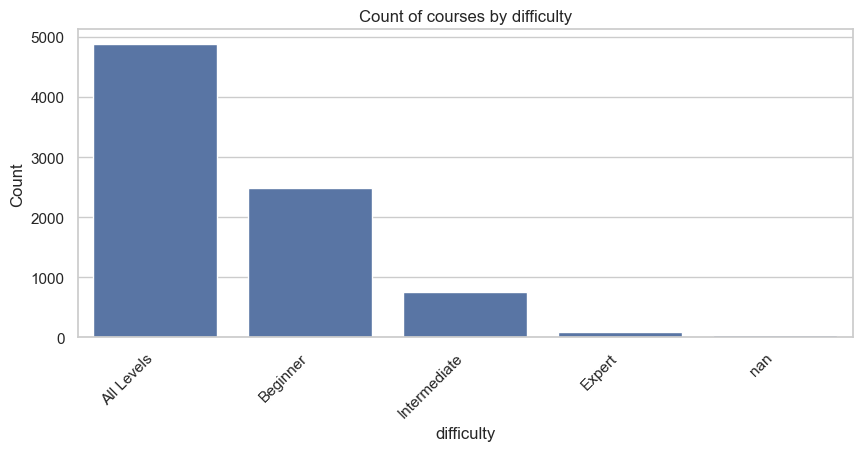

In [16]:
# Univariate EDA BEFORE outlier handling

# 1. Numeric summary
num_cols = ["price", "reviews", "rating", "duration", "lecture_numbers","instr_total_reviews","instr_log_total_reviews", "instr_mean_rating",
            "instr_course_count"]
print("Numeric summary (before outlier handling):")
print(df[num_cols].describe())

# 2. Histograms  for numeric variables
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col} (before outlier handling)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


# 3. Categorical summaries
cat_cols = ["category", "difficulty"]

for col in cat_cols:
    print(f"\nValue counts for {col} :")
    print(df[col].value_counts())

    plt.figure(figsize=(10, 4))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order)
    plt.title(f"Count of courses by {col}")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Count")
    plt.show()

**Outlier detection and handling**

In [17]:
outlier_cols = ["price", "reviews", "duration", "lecture_numbers", "instr_total_reviews"]

Detect Outliers

*Boxplot before handling*

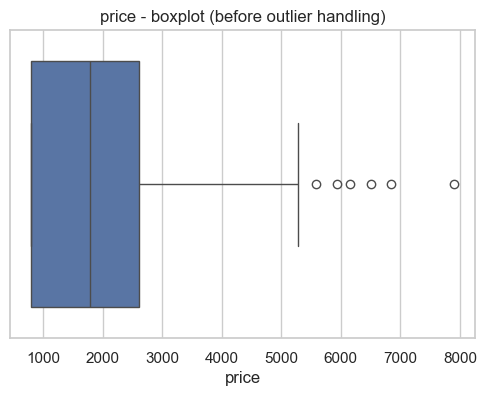

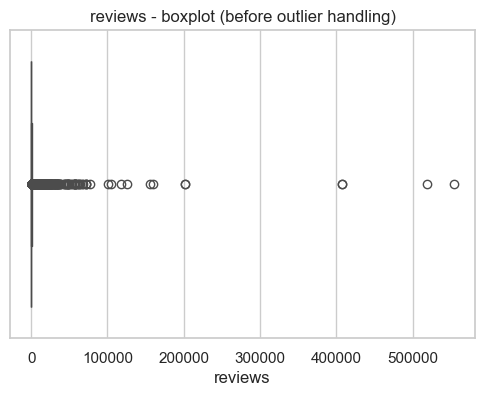

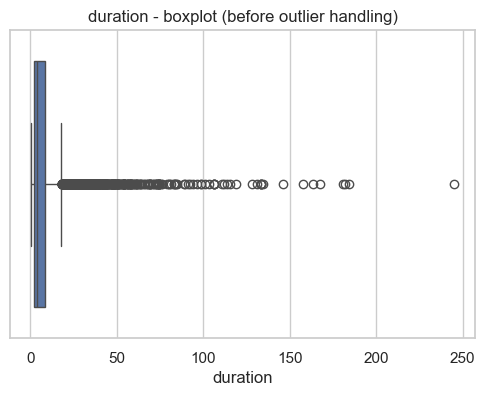

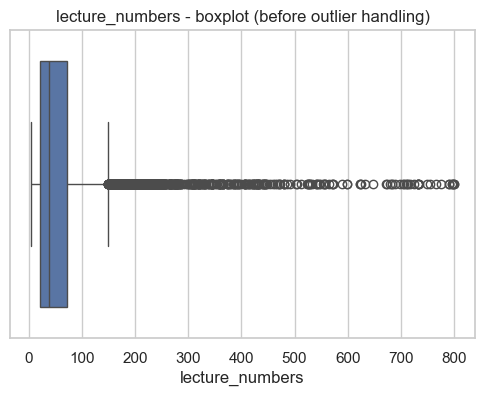

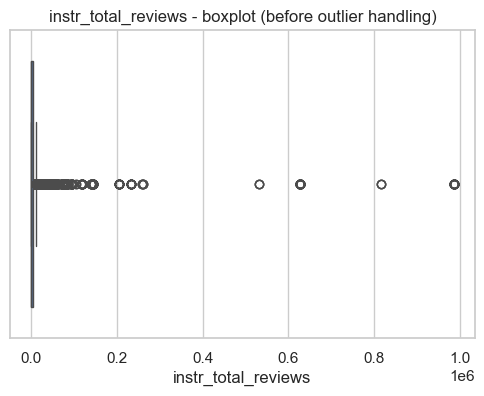

In [18]:
for col in outlier_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} - boxplot (before outlier handling)")
    plt.xlabel(col)
    plt.show()

In [19]:
def iqr_bounds(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - factor * iqr
    upper = q3 + factor * iqr
    return lower, upper


In [20]:
outlier_info = {}

for col in outlier_cols:
    s = df[col].dropna()
    lower, upper = iqr_bounds(s, factor=1.5)
    mask_outlier = (df[col] < lower) | (df[col] > upper)
    n_outliers = mask_outlier.sum()
    outlier_info[col] = {
        "lower_bound": lower,
        "upper_bound": upper,
        "n_outliers": int(n_outliers)
    }

    print(f"\nColumn: {col}")
    print(f"  Number of outliers: {n_outliers}")



Column: price
  Number of outliers: 6

Column: reviews
  Number of outliers: 1270

Column: duration
  Number of outliers: 736

Column: lecture_numbers
  Number of outliers: 741

Column: instr_total_reviews
  Number of outliers: 1152


Handle outliers by capping

In [21]:
def cap_outliers_iqr(series, factor=1.5):
    lower, upper = iqr_bounds(series, factor)
    return series.clip(lower, upper)

for col in outlier_cols:
    df[col] = cap_outliers_iqr(df[col])


*Boxplots after handling*

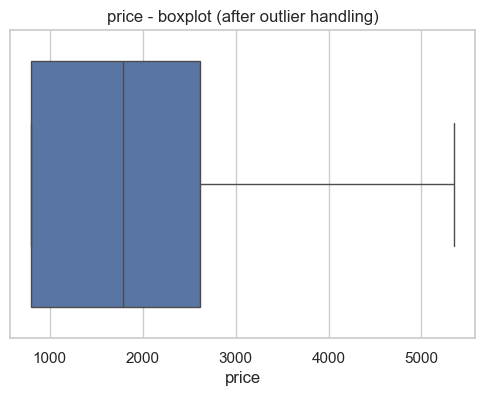

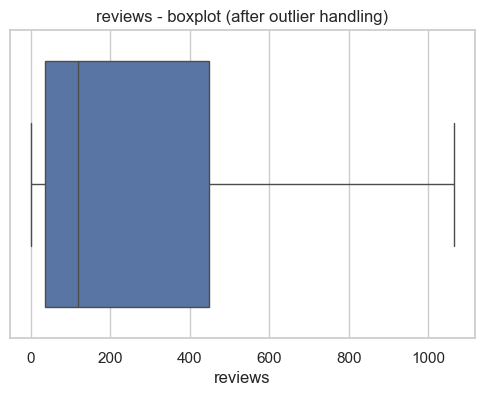

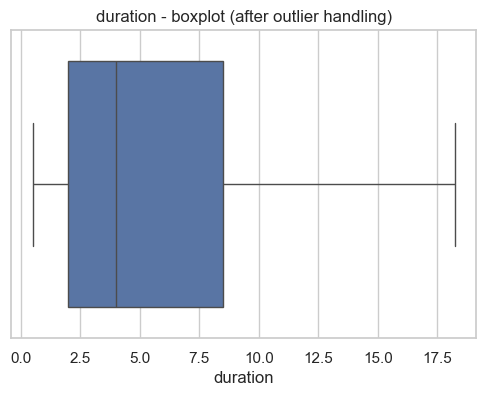

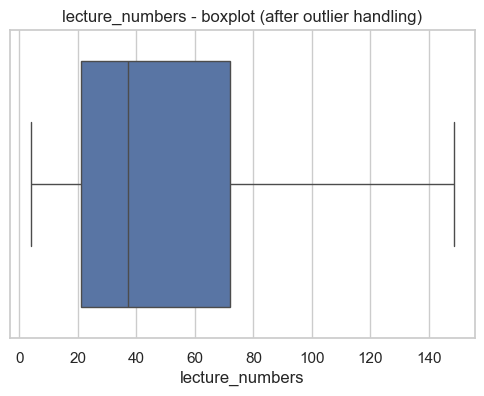

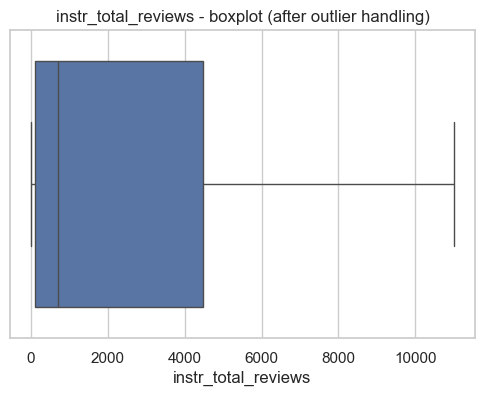

In [22]:
for col in outlier_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} - boxplot (after outlier handling)")
    plt.xlabel(col)
    plt.show()

**Define Composite Success Score (rating + reviews) & success_label**

In [23]:
# reviews is proxy for enrollment; log-transform to reduce skew
df["log_reviews"] = np.log1p(df["reviews"])

# Composite success score
df["success_score"] = 0.6 * df["rating"] + 0.4 * df["log_reviews"]


In [24]:
#high vs low success 
threshold = df["success_score"].median()
df["success_label"] = (df["success_score"] >= threshold).astype(int)

print("\nSuccess score examples:")
print(df[["title", "rating", "reviews", "log_reviews",
          "success_score", "success_label"]].head())



Success score examples:
                                               title  rating  reviews  \
0  [AI] Create a Object Recognition Web App with ...     4.3     37.0   
1  [NEW] Learn AI, ML, DL, Gen AI Basics: A Quick...     5.0      1.0   
2  10 Days of No Code Artificial Intelligence Boo...     4.4   1064.5   
3  AI & Cognitive Science: Bridging Minds and Mac...     4.0    101.0   
4  AI and Machine Learning Foundations for Busine...     4.6     34.0   

   log_reviews  success_score  success_label  
0     3.637586       4.035034              0  
1     0.693147       3.277259              0  
2     6.971199       5.428480              1  
3     4.624973       4.249989              0  
4     3.555348       4.182139              0  


**Univariate EDA**

In [25]:
num_cols = ["price", "reviews", "rating",
            "duration", "lecture_numbers", "success_score","instr_log_total_reviews", "instr_mean_rating",
            "instr_course_count"]
print("\nNumeric summary (for EDA):")
print(df[num_cols].describe())


Numeric summary (for EDA):
             price      reviews       rating     duration  lecture_numbers  \
count  8249.000000  8249.000000  8249.000000  8249.000000      8249.000000   
mean   1856.106316   311.893805     4.371015     6.014850        52.867196   
std    1034.952125   379.610866     0.325195     5.409677        42.786900   
min     799.000000     1.000000     0.000000     0.500000         4.000000   
25%     799.000000    37.000000     4.200000     2.000000        21.000000   
50%    1789.000000   118.000000     4.400000     4.000000        37.000000   
75%    2619.000000   448.000000     4.600000     8.500000        72.000000   
max    5349.000000  1064.500000     5.000000    18.250000       148.500000   

       success_score  instr_log_total_reviews  instr_mean_rating  \
count    8249.000000              8249.000000        8249.000000   
mean        4.550059                 6.614531           4.371015   
std         0.657829                 2.473764           0.277335 

Histograms for numeric features

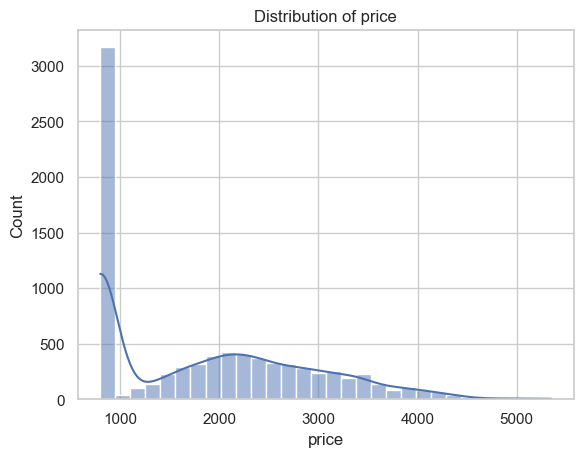

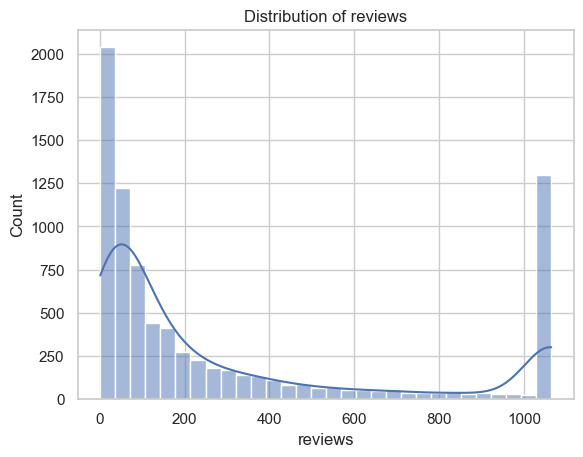

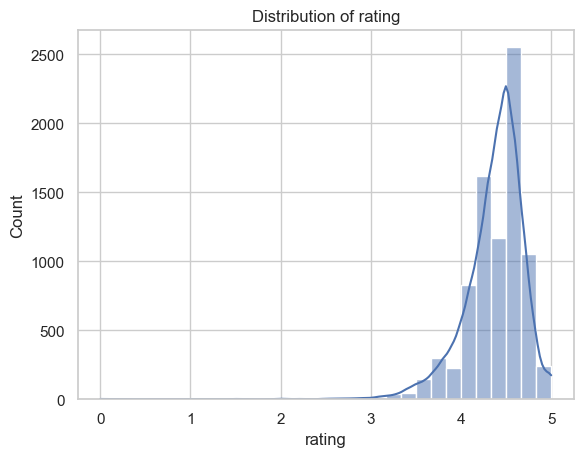

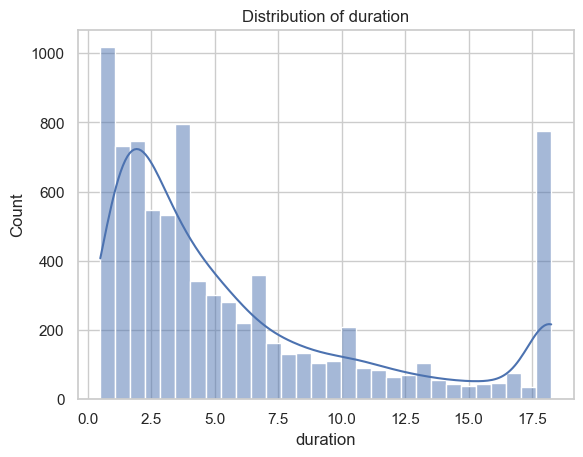

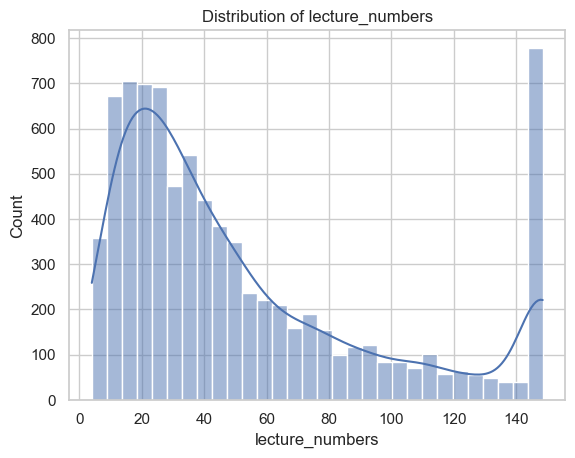

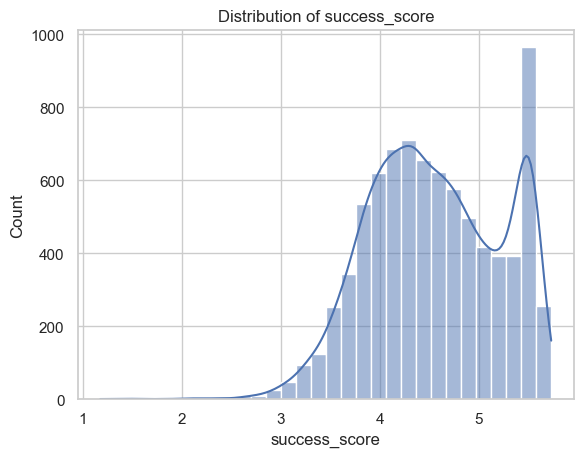

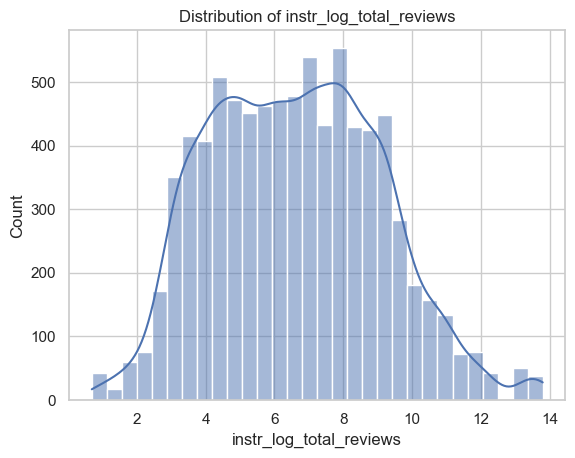

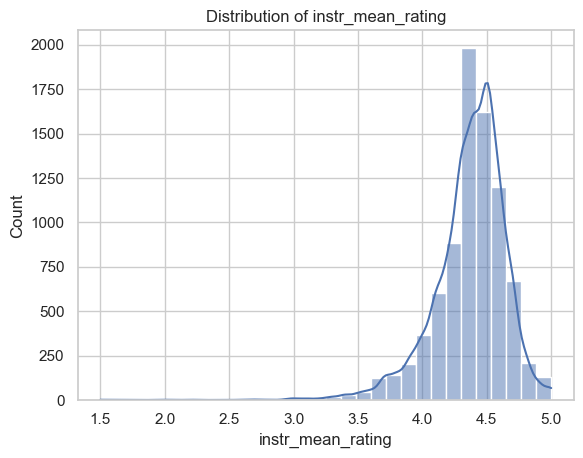

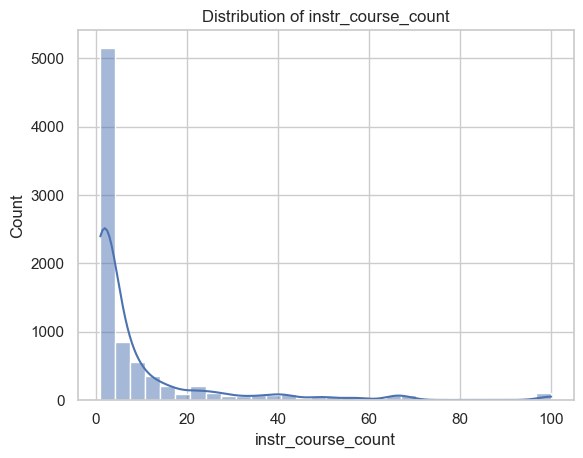

In [26]:
for col in num_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

Countplot for categorical features

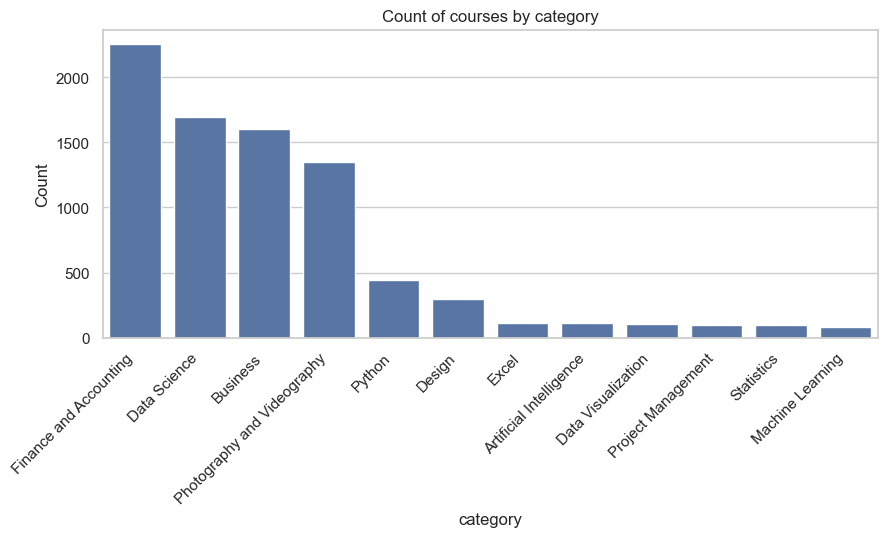

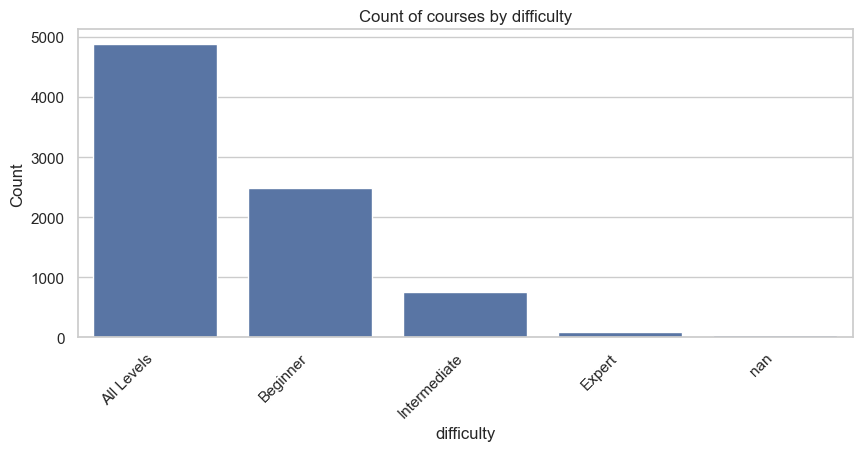

In [27]:
cat_cols = ["category", "difficulty"]

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order)
    plt.title(f"Count of courses by {col}")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Count")
    plt.show()


Target label distribution

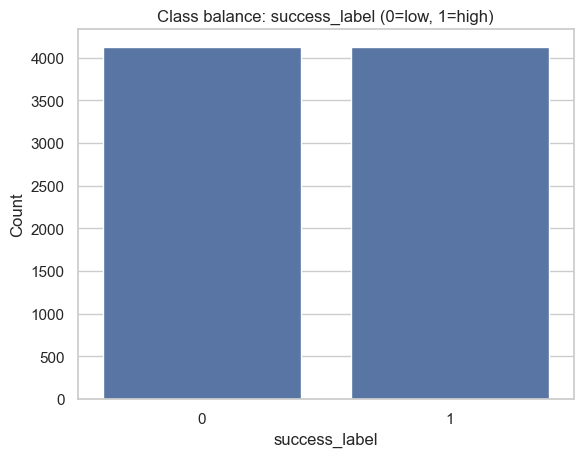


Class balance proportions:
success_label
1    0.500182
0    0.499818
Name: proportion, dtype: float64


In [28]:
plt.figure()
sns.countplot(data=df, x="success_label")
plt.title("Class balance: success_label (0=low, 1=high)")
plt.xlabel("success_label")
plt.ylabel("Count")
plt.show()

print("\nClass balance proportions:")
print(df["success_label"].value_counts(normalize=True))


**Bivariate EDA vs success**

Rating vs success_score & success_label

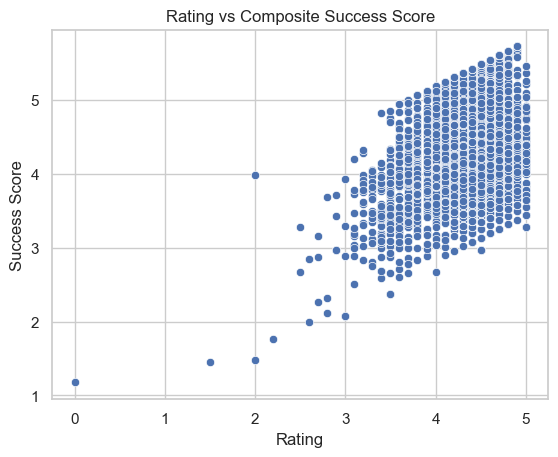

In [29]:
plt.figure()
sns.scatterplot(data=df, x="rating", y="success_score")
plt.title("Rating vs Composite Success Score")
plt.xlabel("Rating")
plt.ylabel("Success Score")
plt.show()

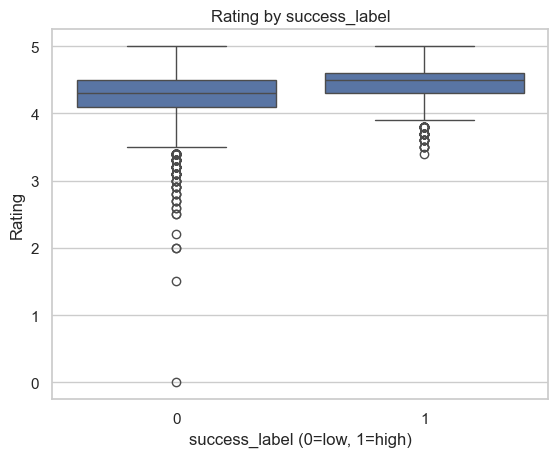

In [30]:
plt.figure()
sns.boxplot(data=df, x="success_label", y="rating")
plt.title("Rating by success_label")
plt.xlabel("success_label (0=low, 1=high)")
plt.ylabel("Rating")
plt.show()


Reviews vs success

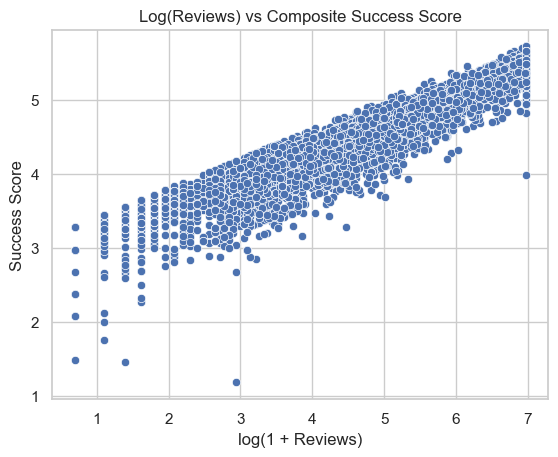

In [31]:
plt.figure()
sns.scatterplot(data=df, x="log_reviews", y="success_score")
plt.title("Log(Reviews) vs Composite Success Score")
plt.xlabel("log(1 + Reviews)")
plt.ylabel("Success Score")
plt.show()


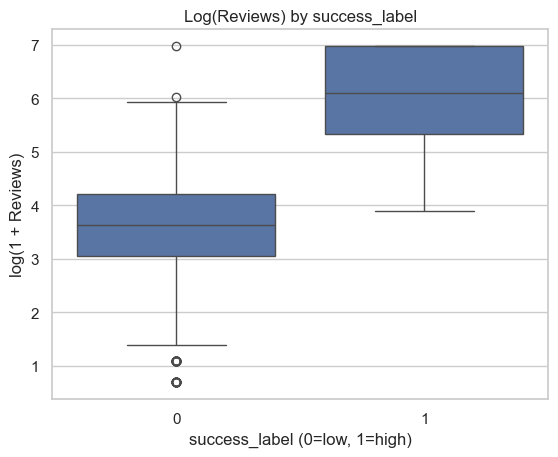

In [32]:
plt.figure()
sns.boxplot(data=df, x="success_label", y="log_reviews")
plt.title("Log(Reviews) by success_label")
plt.xlabel("success_label (0=low, 1=high)")
plt.ylabel("log(1 + Reviews)")
plt.show()

Price vs success

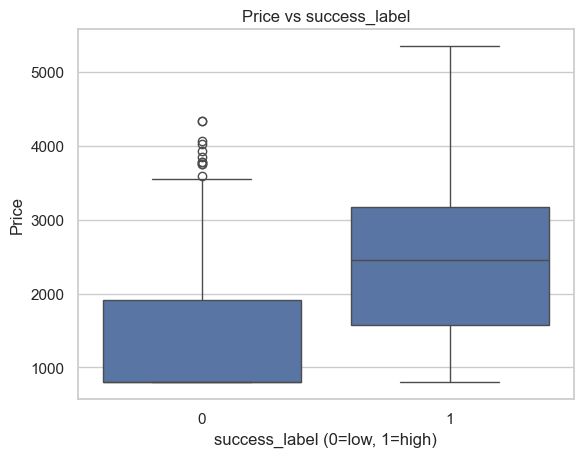

In [33]:
plt.figure()
sns.boxplot(data=df, x="success_label", y="price")
plt.title("Price vs success_label")
plt.xlabel("success_label (0=low, 1=high)")
plt.ylabel("Price")
plt.show()


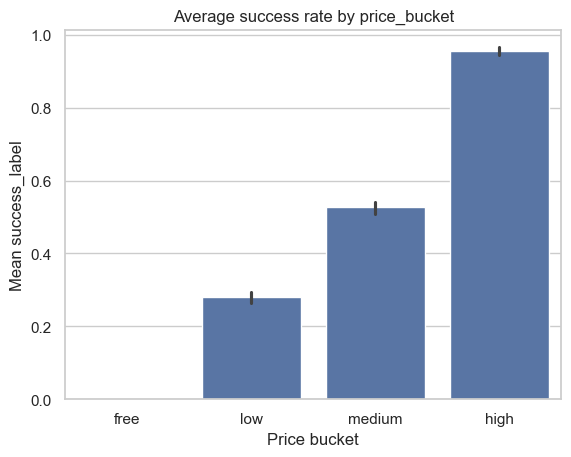

In [34]:
price_bins = [-0.01, 0, 1000, 3000, np.inf]
price_labels = ["free", "low", "medium", "high"]
df["price_bucket"] = pd.cut(df["price"], bins=price_bins, labels=price_labels)

plt.figure()
sns.barplot(data=df, x="price_bucket", y="success_label", estimator=np.mean)
plt.title("Average success rate by price_bucket")
plt.xlabel("Price bucket")
plt.ylabel("Mean success_label")
plt.show()

Duration vs success

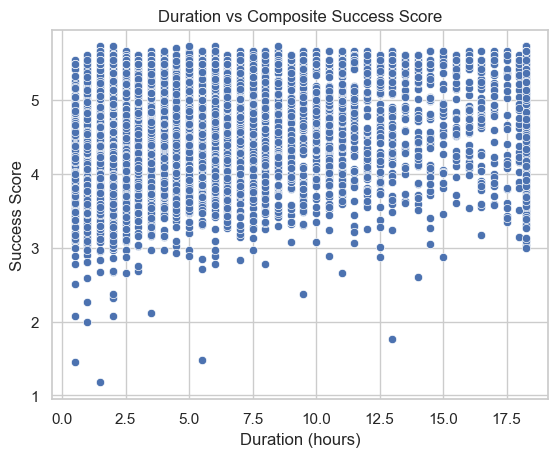

In [35]:
plt.figure()
sns.scatterplot(data=df, x="duration", y="success_score")
plt.title("Duration vs Composite Success Score")
plt.xlabel("Duration (hours)")
plt.ylabel("Success Score")
plt.show()

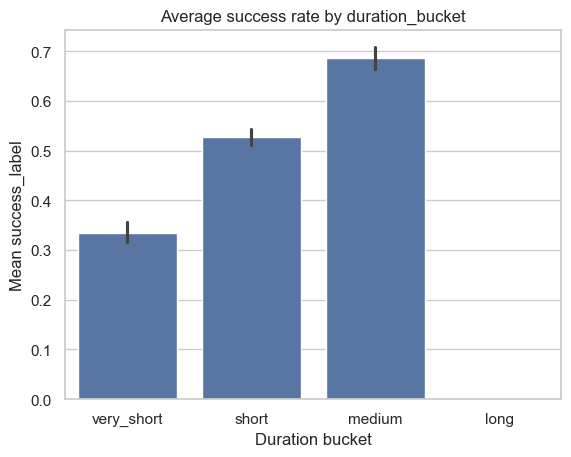

In [36]:
duration_bins = [-0.01, 2, 10, 30, np.inf]
duration_labels = ["very_short", "short", "medium", "long"]
df["duration_bucket"] = pd.cut(df["duration"],bins=duration_bins,labels=duration_labels)
                               
plt.figure()
sns.barplot(data=df, x="duration_bucket", y="success_label", estimator=np.mean)
plt.title("Average success rate by duration_bucket")
plt.xlabel("Duration bucket")
plt.ylabel("Mean success_label")
plt.show()

Lecture_numbers vs success

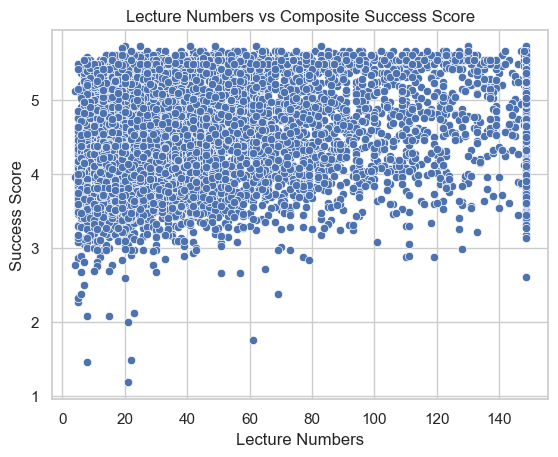

In [37]:
plt.figure()
sns.scatterplot(data=df, x="lecture_numbers", y="success_score")
plt.title("Lecture Numbers vs Composite Success Score")
plt.xlabel("Lecture Numbers")
plt.ylabel("Success Score")
plt.show()

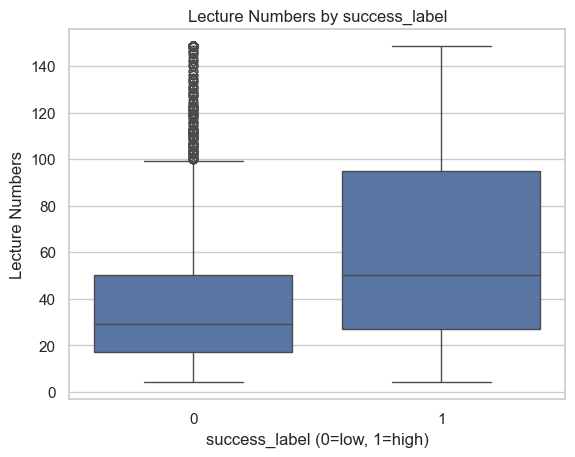

In [38]:
plt.figure()
sns.boxplot(data=df, x="success_label", y="lecture_numbers")
plt.title("Lecture Numbers by success_label")
plt.xlabel("success_label (0=low, 1=high)")
plt.ylabel("Lecture Numbers")
plt.show()

Instructor popularity vs success

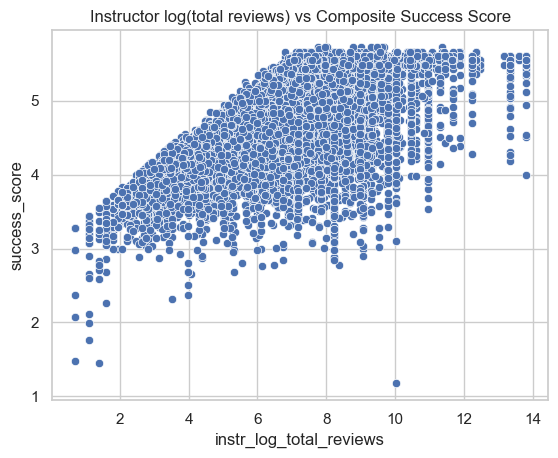

In [39]:
plt.figure()
sns.scatterplot(data=df, x="instr_log_total_reviews", y="success_score")
plt.title("Instructor log(total reviews) vs Composite Success Score")
plt.xlabel("instr_log_total_reviews")
plt.ylabel("success_score")
plt.show()

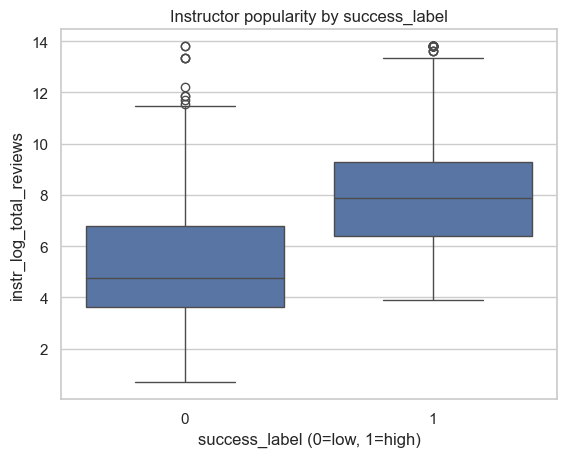

In [40]:
plt.figure()
sns.boxplot(data=df, x="success_label", y="instr_log_total_reviews")
plt.title("Instructor popularity by success_label")
plt.xlabel("success_label (0=low, 1=high)")
plt.ylabel("instr_log_total_reviews")
plt.show()

Category & Difficulty vs success

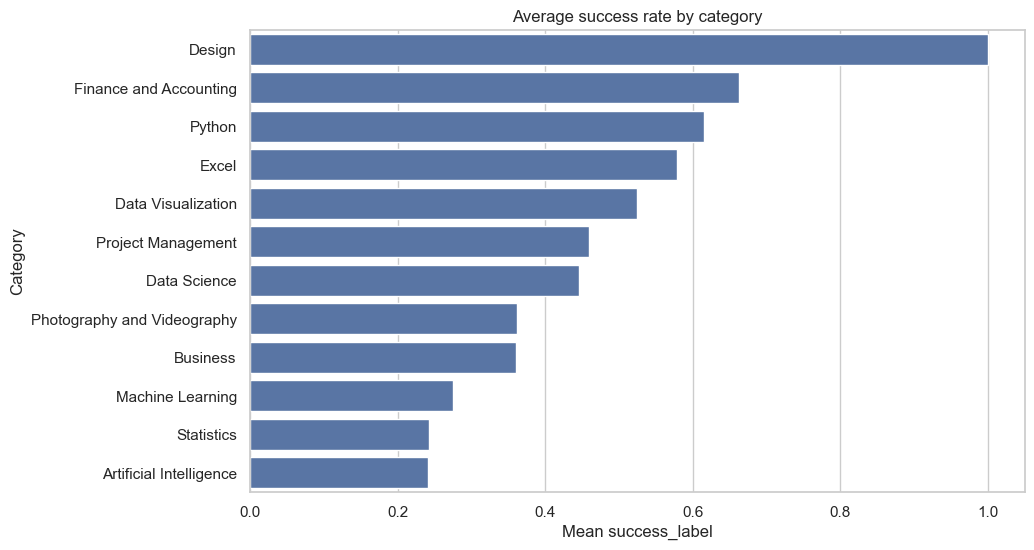

In [41]:
# Category success rate
cat_success = (df.groupby("category")["success_label"]
               .mean()
               .sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(x=cat_success.values, y=cat_success.index)
plt.title("Average success rate by category")
plt.xlabel("Mean success_label")
plt.ylabel("Category")
plt.show()

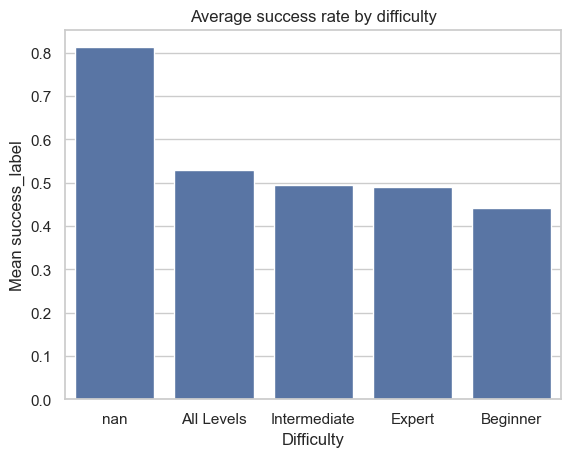

In [42]:
# Difficulty success rate
diff_success = (df.groupby("difficulty")["success_label"]
                .mean()
                .sort_values(ascending=False))

plt.figure()
sns.barplot(x=diff_success.index, y=diff_success.values)
plt.title("Average success rate by difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Mean success_label")
plt.show()


**Correlation heatmap (numeric vs success_score)**

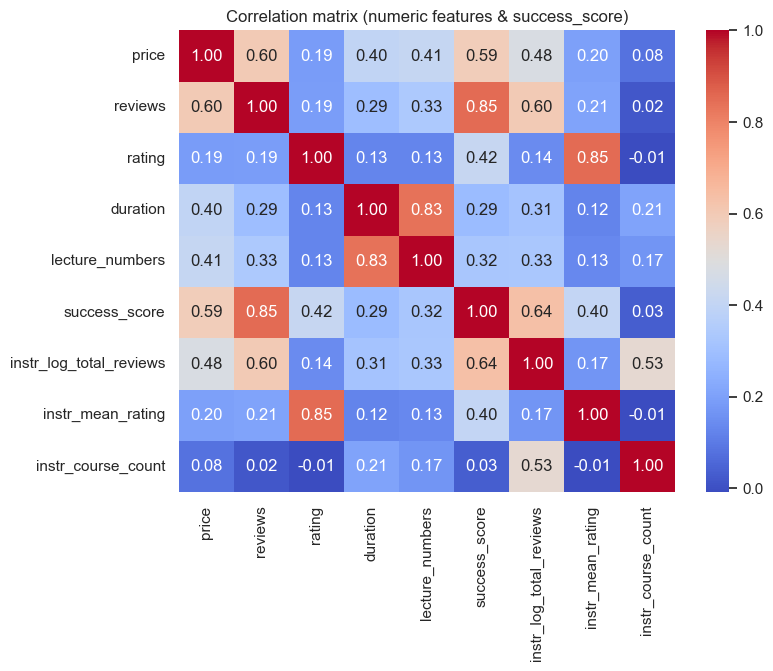


Correlation matrix:
                            price   reviews    rating  duration  \
price                    1.000000  0.600364  0.185854  0.400166   
reviews                  0.600364  1.000000  0.189638  0.294002   
rating                   0.185854  0.189638  1.000000  0.126049   
duration                 0.400166  0.294002  0.126049  1.000000   
lecture_numbers          0.410366  0.334331  0.129419  0.834714   
success_score            0.589958  0.850379  0.416522  0.286162   
instr_log_total_reviews  0.477234  0.599606  0.142148  0.311979   
instr_mean_rating        0.197761  0.207905  0.852829  0.124754   
instr_course_count       0.078796  0.015317 -0.007202  0.205496   

                         lecture_numbers  success_score  \
price                           0.410366       0.589958   
reviews                         0.334331       0.850379   
rating                          0.129419       0.416522   
duration                        0.834714       0.286162   
lecture_numbe

In [43]:
num_for_corr = df[["price", "reviews", "rating",
                   "duration", "lecture_numbers", "success_score","instr_log_total_reviews", "instr_mean_rating",
    "instr_course_count"]]

corr = num_for_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix (numeric features & success_score)")
plt.show()

print("\nCorrelation matrix:")
print(corr)

**Remove unnecessary columns**

In [44]:
# Drop identifiers: title, instructor
df_model = df.drop(columns=["title", "instructor"])

print("\nColumns kept :")
print(df_model.columns)



Columns kept :
Index(['category', 'price', 'reviews', 'rating', 'duration', 'lecture_numbers',
       'difficulty', 'instr_total_reviews', 'instr_mean_rating',
       'instr_course_count', 'instr_log_total_reviews', 'log_reviews',
       'success_score', 'success_label', 'price_bucket', 'duration_bucket'],
      dtype='object')


In [45]:
numeric_features = [
    "price",
    "reviews",
    "rating",
    "duration",
    "lecture_numbers",
    "instr_log_total_reviews",
    "instr_mean_rating",
    "instr_course_count"
]

categorical_features = [
    "category",
    "difficulty",
    "price_bucket",
    "duration_bucket"
]


In [46]:
X_num = df_model[numeric_features].copy()
X_cat = df_model[categorical_features].copy()
y = df_model["success_label"].copy()


**Encode categorical features**

In [47]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat_encoded = ohe.fit_transform(X_cat)
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

**Scale numeric features**

In [48]:
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)


In [49]:
X_final = np.concatenate([X_num_scaled, X_cat_encoded], axis=1)

In [50]:
print("\nNumeric features shape:", X_num_scaled.shape)
print("Categorical (OHE) features shape:", X_cat_encoded.shape)
print("Final X shape:", X_final.shape)
print("Target y shape:", y.shape)



Numeric features shape: (8249, 8)
Categorical (OHE) features shape: (8249, 23)
Final X shape: (8249, 31)
Target y shape: (8249,)


In [51]:
all_feature_names = numeric_features + list(ohe_feature_names)
X_final_df = pd.DataFrame(X_final, columns=all_feature_names)

print("\nFirst rows of processed feature matrix:")
print(X_final_df.head())


First rows of processed feature matrix:
      price   reviews    rating  duration  lecture_numbers  \
0  0.147739 -0.724190 -0.218389 -0.557341        -0.254000   
1 -1.021468 -0.819030  1.934297 -0.649773        -0.370865   
2  2.437839  1.982693  0.089138  1.198878         1.428860   
3  1.094700 -0.555586 -1.140969  2.261853         2.235231   
4 -1.021468 -0.732094  0.704191 -0.464908        -0.464357   

   instr_log_total_reviews  instr_mean_rating  instr_course_count  \
0                -1.203480          -0.256076           -0.495657   
1                -1.607152           1.006010           -0.434626   
2                 0.673069           0.284818           -0.434626   
3                 0.647784          -0.301151            0.419800   
4                 0.466354           0.465116           -0.373596   

   category_Artificial Intelligence  category_Business  ...  \
0                               1.0                0.0  ...   
1                               1.0          

**Train/test split**

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final,y,test_size=0.2,random_state=42,stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (6599, 31)
Test shape: (1650, 31)


**Baseline models and Cross Validation**

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [54]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=500, n_jobs=-1),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
}

cv_results = {}

for name, clf in models.items():
    scores = cross_val_score(
        estimator=clf,
        X=X_train,
        y=y_train,
        cv=5,
        scoring="f1",
        n_jobs=-1
    )
    cv_results[name] = scores
    print(f"{name} - F1 (5-fold): mean={scores.mean():.4f}, std={scores.std():.4f}")


LogisticRegression - F1 (5-fold): mean=0.9702, std=0.0048
RandomForest - F1 (5-fold): mean=0.9777, std=0.0029
GradientBoosting - F1 (5-fold): mean=0.9968, std=0.0013


**Hyperparameter tuning (GridSearchCV) for RF & GB**

In [55]:
from sklearn.model_selection import GridSearchCV

# Random Forest grid
rf_param_grid = {
    "n_estimators": [100, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train)

print("\nRandomForest best params:", rf_grid.best_params_)
print("RandomForest best CV F1:", rf_grid.best_score_)

# Gradient Boosting grid
gb_param_grid = {
    "n_estimators": [100, 300],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}

gb_grid = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=gb_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)
gb_grid.fit(X_train, y_train)

print("\nGradientBoosting best params:", gb_grid.best_params_)
print("GradientBoosting best CV F1:", gb_grid.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits

RandomForest best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
RandomForest best CV F1: 0.9790827768960657
Fitting 5 folds for each of 8 candidates, totalling 40 fits

GradientBoosting best params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
GradientBoosting best CV F1: 0.9974264159513322


**Select best model**

In [56]:
best_model_name = None
best_cv_score = -1
best_model = None

if rf_grid.best_score_ >= gb_grid.best_score_:
    best_model_name = "RandomForest"
    best_cv_score = rf_grid.best_score_
    best_model = rf_grid.best_estimator_
else:
    best_model_name = "GradientBoosting"
    best_cv_score = gb_grid.best_score_
    best_model = gb_grid.best_estimator_

print(f"\nSelected model: {best_model_name} with CV F1={best_cv_score:.4f}")


Selected model: GradientBoosting with CV F1=0.9974


Final evaluation on test set

In [57]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

y_pred_test = best_model.predict(X_test)

print("\nTest accuracy:", accuracy_score(y_test, y_pred_test))
print("Test F1:", f1_score(y_test, y_pred_test))
print("\nClassification report:")
print(classification_report(y_test, y_pred_test))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_test))


Test accuracy: 0.9975757575757576
Test F1: 0.9975728155339806

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       825
           1       1.00      1.00      1.00       825

    accuracy                           1.00      1650
   macro avg       1.00      1.00      1.00      1650
weighted avg       1.00      1.00      1.00      1650


Confusion matrix:
[[824   1]
 [  3 822]]


**Pickle the Model**

In [58]:
import pickle

# Refit on full feature set
best_model.fit(X_final, y)

artifacts = {
    "scaler": scaler,
    "ohe": ohe,
    "numeric_features": numeric_features,
    "categorical_features": categorical_features,
    "model": best_model
}

with open("course_success_model.pkl", "wb") as f:
    pickle.dump(artifacts, f)

print("Saved pickle: course_success_model.pkl")

Saved pickle: course_success_model.pkl
